<a href="https://colab.research.google.com/github/mannmoshe/machine-learning/blob/main/FinalProject/DetailedResidencePlans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project - Detailed residence plans<br>*By Moshe Mann*

**Overview**<br>
The Israel Planning Administration (IPA) is handling detailed construction plans.<BR>Every detailed plan contains a lot of data, among the rest, division of main and service area.<BR><BR>Main area is the area that divided among the tenants, like the departments,<BR> and the service area is common to all tenants, like parking, stairwell etc.<BR><BR>
In the near future the plans will not include the division between main and service area, because it is not important for the IPA as planning unit, but still, it is important data for regulation.<BR><BR> The purpose of the project is to predict the main and service areas based on the cell and plan features, so that the model can be used for regulatory purposes.

You can view plan's details and documents at:<br>
https://mavat.moin.gov.il/MavatPS/Forms/SV3.aspx?tid=3<br>
by entering the PL_NUMBER.<BR>
The "MAIN_AREA" data founds at "Plan Instructions" file (הוראות התכנית).

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
cellsdata = pd.read_csv('https://raw.githubusercontent.com/mannmoshe/machine-learning/main/FinalProject/cellsData.csv')

The data comes from detailed plans with residence area that confirmed between Jan 2017 and Nov 2021.
### Data Features

<table>
  <tbody>    
    <tr valign="top">
      <td valign="top">
        <ul>
          <li>PL_NUMBER : Number of plan</li>
          <br>
          <li>PL_AREA: Number of plan concatenate to number of area-cell</li>
          <br>          
          <li>LANDUSE: Usage of land</li>
          <br>
          <li>MAIN_AREA: Area divided among the tentants above the determining entrance (square meter)<br>This is the dependent variable that need to be predicted!</li>
          <br>
          <li>SERVICE_AREA: Common area of all the tentants above the determining entrance (square meter)</li>
          <br>
          <li>CELL_SIZE_TOTAL: The size of area-cell</li>
          <br>
          <li>CELL_SIZE_MIN: The minimum size of area-cell</li>
          <br>
          <li>CELL_SIZE_MAX: The maximum size of area-cell</li>
          <br>
          <li>HOUSING_UNITS: Number of housing units</li>
          <br>
          <li>BUILDING_HEIGHT: Height of building (meter)</li>
          <br>
          <li>FLOORS_NUM: Number of floors</li>
          <br>
          <li>TOTAL_AREA: Sum of Main area and Service area</li>
          <br>
          <li>AUTHORITY: Authority of plan</li>
          <br>
          <li>DISTRICT: District of plan</li>
          <br>
          <li>SECTOR_GROUP: Sector of plan</li>
          <br>
          <li>CONFIRMATION_YEAR: Year of plan's confirmation</li>
          <br>
          <li>CONSTRUCTION_TYPE_GROUP: Type of construction</li>          
        </ul>
      </td>
    </tr>
    
  </tbody>
</table>

In [3]:
cellsdata.shape

(13709, 17)

In [4]:
cellsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13709 entries, 0 to 13708
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PL_NUMBER                13709 non-null  object 
 1   PL_AREA                  13709 non-null  object 
 2   LANDUSE                  13709 non-null  object 
 3   MAIN_AREA                13709 non-null  float64
 4   SERVICE_AREA             13709 non-null  float64
 5   CELL_SIZE_TOTAL          13709 non-null  float64
 6   CELL_SIZE_MIN            13709 non-null  float64
 7   CELL_SIZE_MAX            13709 non-null  float64
 8   HOUSING_UNITS            13709 non-null  float64
 9   BUILDING_HEIGHT          13709 non-null  float64
 10  FLOORS_NUM               13709 non-null  float64
 11  TOTAL_AREA               13709 non-null  float64
 12  AUTHORITY                13709 non-null  object 
 13  DISTRICT                 13709 non-null  object 
 14  SECTOR_GROUP          

## Data Preprocessing

Because almost every plan consist of multiple area, and usually area's features of same plan are very similar, what might give extra influence for specific plan - I will take only the first area of every plan.  

In [5]:
data = cellsdata.drop_duplicates(subset="PL_NUMBER", keep="first")
data.shape

(2582, 17)

In [6]:
data.head(3)

,PL_NUMBER,PL_AREA,LANDUSE,MAIN_AREA,SERVICE_AREA,CELL_SIZE_TOTAL,CELL_SIZE_MIN,CELL_SIZE_MAX,HOUSING_UNITS,BUILDING_HEIGHT,FLOORS_NUM,TOTAL_AREA,AUTHORITY,DISTRICT,SECTOR_GROUP,CONFIRMATION_YEAR,CONSTRUCTION_TYPE_GROUP
0,610-0197038,610-0197038-102,מגורים,975.0,300.0,2466.0,0.0,0.0,16.0,11.0,2.0,1275.0,מחוזית,דרום,חברה כללית / מעורבת,2017,חדשה
2,151-0392894,151-0392894-210,מגורים,960.0,180.0,2820.0,0.0,0.0,6.0,17.0,4.0,1140.0,מחוזית,ירושלים,חברה כללית / מעורבת,2017,התחדשות
73,תמל/ 1049,תמל/ 1049-123,מגורים,152.0,48.0,420.0,0.0,0.0,1.0,0.0,2.0,200.0,ארצית,מרכז,חברה כללית / מעורבת,2019,חדשה


In [7]:
# from google.colab import files
# data.to_csv('data.csv', encoding='utf-8-sig')
# files.download("data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The next steps intended for feature engineering.

In [8]:
data['PL_NUMBER'].str.contains('תמל').sum()

60

In [9]:
data['IS_TAMAL'] = data['PL_NUMBER'].apply(lambda x: 1 if 'תמל' in x else 0)
data['IS_TAMAL'].value_counts()

0    2522
1      60
Name: IS_TAMAL, dtype: int64

In [10]:
data['LANDUSE'].value_counts()

מגורים                                2444
מגורים ומסחר                            66
מגורים מסחר ותעסוקה                     36
מגורים מסחר ותיירות                      6
מגורים ומבנים ומוסדות ציבור              6
מגורים תעסוקה ותיירות                    5
מגורים מסחר ומבנים ומוסדות ציבור         5
מגורים ודיור מיוחד                       3
תתתת מגורים ב                            2
מגורים מסחר ותחבורה                      2
מגורים ותיירות                           2
מגורים ומשרדים                           2
מגורים ותחבורה                           1
מגורים תיירות ומבנים ומוסדות ציבור       1
מגורים ואירוח כפרי                       1
Name: LANDUSE, dtype: int64

In [11]:
data['LANDUSE'] = data['LANDUSE'].mask(data['LANDUSE'] != 'מגורים', 'מגורים משולב')

In [12]:
data['LANDUSE'].value_counts()

מגורים          2444
מגורים משולב     138
Name: LANDUSE, dtype: int64

The columns CELL_SIZE_TOTAL, CELL_SIZE_MIN and CELL_SIZE_MAX describe the cell size.

In [13]:
data[['CELL_SIZE_TOTAL', 'CELL_SIZE_MIN', 'CELL_SIZE_MAX']].describe()

,CELL_SIZE_TOTAL,CELL_SIZE_MIN,CELL_SIZE_MAX
count,2582.000000,2582.000000,2582.000000
mean,1090.196193,168.493582,8.830287
std,2387.854179,954.531702,149.623238
min,0.000000,0.000000,0.000000
25%,386.250000,0.000000,0.000000
50%,659.500000,0.000000,0.000000
75%,1020.750000,0.000000,0.000000
max,63924.000000,32000.000000,5690.000000


HOUSING_UNITS shold not be zero.

In [14]:
data['HOUSING_UNITS'].value_counts().sort_index().head()

0.0     79
1.0    353
2.0    225
3.0    162
4.0    393
Name: HOUSING_UNITS, dtype: int64

In [15]:
data['HOUSING_UNITS'] = data['HOUSING_UNITS'].mask(data['HOUSING_UNITS'] == 0, data['FLOORS_NUM']*2)

In [16]:
data['HOUSING_UNITS'].value_counts().sort_index().head()

0.0      2
1.0    353
2.0    227
3.0    162
4.0    406
Name: HOUSING_UNITS, dtype: int64

In [17]:
data = data[data['HOUSING_UNITS'] > 0]
data.shape 

(2580, 18)

In [18]:
data['BUILDING_HEIGHT'].value_counts()[:11].head()

0.0     249
12.0    246
8.5     178
15.0    162
9.0     125
Name: BUILDING_HEIGHT, dtype: int64

A lot of missing data, BUILDING_HEIGHT should not be zero.<br>
I will replace it with the mean of BUILDING_HEIGHT with correct values (greather than 0).

In [19]:
building_height_avg = round(data[data['BUILDING_HEIGHT'] > 0]['BUILDING_HEIGHT'].mean())
building_height_avg

16

In [20]:
data['BUILDING_HEIGHT'] = data['BUILDING_HEIGHT'].mask(data['BUILDING_HEIGHT']==0, building_height_avg)
data['BUILDING_HEIGHT'].value_counts().head()

16.0    293
12.0    246
8.5     178
15.0    162
9.0     125
Name: BUILDING_HEIGHT, dtype: int64

In [21]:
data['SECTOR_GROUP'].value_counts()

חברה ערבית             1272
חברה כללית / מעורבת    1042
חברה חרדית              207
(חסר)                    59
Name: SECTOR_GROUP, dtype: int64

In [22]:
data['SECTOR_GROUP'] = data['SECTOR_GROUP'].mask(data['SECTOR_GROUP'] == '(חסר)', 'חברה כללית / מעורבת')
data['SECTOR_GROUP'].value_counts()

חברה ערבית             1272
חברה כללית / מעורבת    1101
חברה חרדית              207
Name: SECTOR_GROUP, dtype: int64

Let's [handle null values](https://stackoverflow.com/questions/57135918/remove-non-zero-fields-from-df-isnull-sum/57135996):

In [23]:
nullseries = data.isnull().sum()
nullseries[nullseries > 0]

CONSTRUCTION_TYPE_GROUP    4
dtype: int64

In [24]:
data['CONSTRUCTION_TYPE_GROUP'].value_counts(dropna=False)

חדשה       1525
התחדשות     921
הסדרה       130
NaN           4
Name: CONSTRUCTION_TYPE_GROUP, dtype: int64

[Fill null with most frequent value.](https://stackoverflow.com/questions/32617811/imputation-of-missing-values-for-categories-in-pandas) 

In [25]:
data['CONSTRUCTION_TYPE_GROUP'] = data['CONSTRUCTION_TYPE_GROUP'].fillna(data['CONSTRUCTION_TYPE_GROUP'].mode().iloc[0])
data['CONSTRUCTION_TYPE_GROUP'].value_counts(dropna=False)

חדשה       1529
התחדשות     921
הסדרה       130
Name: CONSTRUCTION_TYPE_GROUP, dtype: int64

In [26]:
data = data.drop(['PL_NUMBER', 'PL_AREA', 'SERVICE_AREA'], axis=1)

Now let's get dummies of the categorical columns so we will be able to bulid a model.

In [27]:
dummies_data = pd.get_dummies(data)
print(dummies_data.shape)
dummies_data.columns = ['MAIN_AREA', 'CELL_SIZE_TOTAL', 'CELL_SIZE_MIN', 'CELL_SIZE_MAX', 'HOUSING_UNITS', 'BUILDING_HEIGHT', 'FLOORS_NUM', 'TOTAL_AREA',
                        'CONFIRMATION_YEAR', 'IS_TAMAL', 'LANDUSE_RESIDENCE', 'LANDUSE_RESIDENCE_MIXED', 'AUTHORITY_COUNTRY', 'AUTHORITY_DISTRICT',
                        'DISTRICT_SOUTH', 'DISTRICT_HAIFA', 'DISTRICT_JERUSALEM', 'DISTRICT_DAN', 'DISTRICT_NORTH', 'DISTRICT_TEL_AVIV', 'SECTOR_REL',
                        'SECTOR_MIXED', 'SECTOR_ARAB', 'CONSTRUCTION_TYPE_ARRANGING', 'CONSTRUCTION_TYPE_REGENERATION', 'CONSTRUCTION_TYPE_NEW']
dummies_data.head()

(2580, 26)


,MAIN_AREA,CELL_SIZE_TOTAL,CELL_SIZE_MIN,CELL_SIZE_MAX,HOUSING_UNITS,BUILDING_HEIGHT,FLOORS_NUM,TOTAL_AREA,CONFIRMATION_YEAR,IS_TAMAL,LANDUSE_RESIDENCE,LANDUSE_RESIDENCE_MIXED,AUTHORITY_COUNTRY,AUTHORITY_DISTRICT,DISTRICT_SOUTH,DISTRICT_HAIFA,DISTRICT_JERUSALEM,DISTRICT_DAN,DISTRICT_NORTH,DISTRICT_TEL_AVIV,SECTOR_REL,SECTOR_MIXED,SECTOR_ARAB,CONSTRUCTION_TYPE_ARRANGING,CONSTRUCTION_TYPE_REGENERATION,CONSTRUCTION_TYPE_NEW
0,975.0,2466.0,0.0,0.0,16.0,11.0,2.0,1275.0,2017,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
2,960.0,2820.0,0.0,0.0,6.0,17.0,4.0,1140.0,2017,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
73,152.0,420.0,0.0,0.0,1.0,16.0,2.0,200.0,2019,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
297,2090.0,1496.0,0.0,0.0,19.0,25.5,6.0,3135.0,2017,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1
322,675.0,563.0,0.0,0.0,4.0,21.0,4.0,900.0,2018,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1


Finally, the data is ready for Machine Learning.<BR>
Let's check correlations:

In [28]:
corr = abs(dummies_data.corr())
corr.loc['MAIN_AREA'].sort_values(ascending=False).head(10)

MAIN_AREA             1.000000
TOTAL_AREA            0.996335
HOUSING_UNITS         0.834821
FLOORS_NUM            0.658868
CELL_SIZE_TOTAL       0.609265
BUILDING_HEIGHT       0.587021
DISTRICT_TEL_AVIV     0.279853
IS_TAMAL              0.185409
AUTHORITY_COUNTRY     0.185409
AUTHORITY_DISTRICT    0.185409
Name: MAIN_AREA, dtype: float64

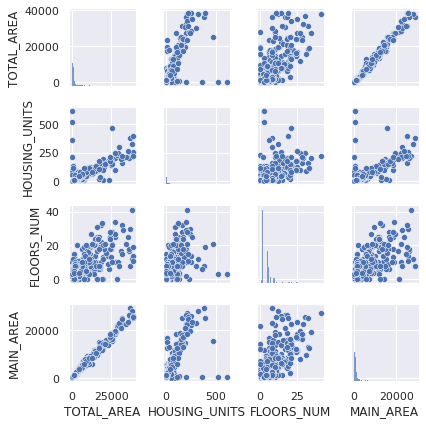

In [137]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(dummies_data[['TOTAL_AREA', 'HOUSING_UNITS', 'FLOORS_NUM', 'MAIN_AREA']], height=1.5);

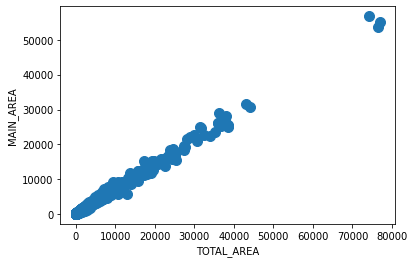

In [30]:
dummies_data.plot.scatter(x = 'TOTAL_AREA', y = 'MAIN_AREA', s = 100)

Removing outliers:

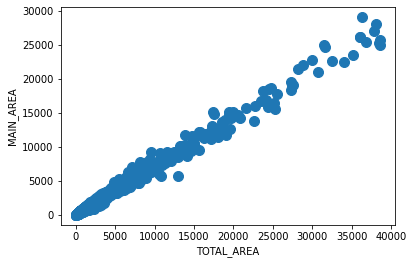

In [31]:
dummies_data = dummies_data[dummies_data['TOTAL_AREA'] < 40000]
dummies_data.plot.scatter(x = 'TOTAL_AREA', y = 'MAIN_AREA', s = 100)

TOTAL_AREA has very strong lienar relationship with MAIN_AREA!<BR><BR>
I will try the KNeighborsRegressor model for predict the MAIN_AREA.<br>The TOTAL_AREA will be the only feature column.

In [32]:
feature_cols = ['TOTAL_AREA'] 

In [33]:
X = dummies_data[feature_cols]
y = dummies_data['MAIN_AREA']

In [34]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# # transform data
# X_scaled = scaler.fit_transform(X)

There is no need to scale X, because I want the model will refer to the actual TOTAL_AREA value. 

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Let's find the best parameters:

In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# find best n_neighbors and weights
params = {'n_neighbors':[3,5,7,9,11,13,15,17,19,21,23,25], 'weights':['uniform', 'distance']}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 15, 'weights': 'distance'}

In [37]:
neigh = KNeighborsRegressor(n_neighbors=15, weights='distance')
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15, weights='distance')

In [38]:
y_pred = neigh.predict(X_test)

In [39]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)
rsquared = r2_score(y_test, y_pred)
print("R Squared:", rsquared)

MAE: 149.55219208940753
MSE: 122649.60587307863
RMSE: 350.2136574622392
R Squared: 0.9869479362725436


[Merging results from model predict with original pandas dataframe.](https://stackoverflow.com/questions/40729162/merging-results-from-model-predict-with-original-pandas-dataframe)


In [40]:
result_df = pd.DataFrame(y_test)
result_df['y_pred'] = y_pred
result_df.columns = ['MAIN_AREA_true', 'MAIN_AREA_predicted']
result_df.T

,12677,12077,9296,12692,11043,11294,4786,12721,13301,13706,13520,11454,13277,11477,12713,11744,12436,9948,12602,12761,11879,11035,11689,12026,11543,13284,1571,1417,12638,13610,13529,13421,9043,11005,13542,11614,13003,13530,1336,13493,...,11663,12196,13598,12073,6517,12045,12778,11412,11698,13554,11958,5172,11776,13345,11804,7057,4577,5879,12161,12000,441,12999,5415,5385,7488,1830,12604,1947,13397,13260,12757,12364,13461,12237,1905,11832,11257,13201,12691,13536
MAIN_AREA_true,1580.000000,275.000000,200.000000,952.0,355.0,75.000000,809.050000,720.0,203.010000,1211.750000,200.00,130.0,596.500000,250.0,396.000000,850.000000,3000.0,640.000000,480.000000,220.0,4352.000000,2460.000000,916.000000,262.0,5130.000000,701.4,123.600000,859.0,350.0,1107.000000,776.000000,472.500000,761.000000,467.28,450.000000,360.0,790.000000,1190.000000,860.000000,1061.000000,...,2336.000000,700.0,750.0,893.000000,90.000000,180.0,1548.030000,1344.000000,875.0,192.0,1903.000000,160.000000,568.000000,730.300000,1525.000000,670.0,1281.000000,870.000000,557.000000,490.0,3476.000000,383.000000,720.0,11875.000000,840.000000,240.0,283.0,360.000,533.000000,7125.000000,990.000000,890.000000,570.000000,399.000000,457.0,19100.000000,475.00000,868.220000,890.500000,270.0
MAIN_AREA_predicted,1638.283819,265.571429,199.369458,1010.0,285.0,89.357078,884.105023,751.8,175.316243,1274.213701,205.25,156.0,543.543257,246.8,375.333333,887.733333,2915.0,692.888889,499.666667,212.0,4883.968123,3294.030025,905.145878,283.0,4859.952531,698.5,136.933501,849.0,345.0,1301.849829,696.351513,402.902643,760.127899,496.10,562.918352,385.0,771.772311,1414.844986,887.733333,1031.684546,...,2035.183312,556.0,800.0,914.258038,134.375517,180.0,1653.837073,1516.477383,777.5,221.0,2371.374929,159.121672,538.666667,903.523062,1730.711936,757.0,1274.275641,938.940979,597.074009,512.0,4553.319911,357.516111,970.0,11932.468314,810.666667,246.8,246.8,334.375,466.772306,5114.103058,983.119223,1146.591923,569.727273,385.037437,468.5,18830.085928,463.88894,755.947408,828.984346,325.0


In [41]:
all_data_with_predictions = pd.merge(cellsdata, result_df, left_index=True, right_index=True)
all_data_with_predictions.head(3)

,PL_NUMBER,PL_AREA,LANDUSE,MAIN_AREA,SERVICE_AREA,CELL_SIZE_TOTAL,CELL_SIZE_MIN,CELL_SIZE_MAX,HOUSING_UNITS,BUILDING_HEIGHT,FLOORS_NUM,TOTAL_AREA,AUTHORITY,DISTRICT,SECTOR_GROUP,CONFIRMATION_YEAR,CONSTRUCTION_TYPE_GROUP,MAIN_AREA_true,MAIN_AREA_predicted
441,307-0322727,307-0322727-47,מגורים,3476.0,2194.0,3650.0,0.0,0.0,38.0,18.0,5.0,5670.0,מחוזית,חיפה,חברה כללית / מעורבת,2017,התחדשות,3476.0,4553.319911
715,618-0420554,618-0420554-172,מגורים,948.0,80.0,1028.0,0.0,0.0,4.0,10.5,2.0,1028.0,מחוזית,דרום,חברה ערבית,2018,חדשה,948.0,859.046203
806,101-0336453,101-0336453-1,מגורים,1605.0,261.0,749.0,0.0,0.0,18.0,18.7,6.0,1866.0,מחוזית,ירושלים,חברה ערבית,2017,התחדשות,1605.0,1491.692307


In [42]:
# all_data_with_predictions.to_csv('all_data_with_predictions.csv', encoding='utf-8-sig')
# files.download("all_data_with_predictions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Now let's test the model again on new data - only areas of plans that confirmed after Nov 2021.**

In [43]:
new_cellsdata = pd.read_csv('https://raw.githubusercontent.com/mannmoshe/machine-learning/main/FinalProject/cellsData_New.csv')
#new_data = new_data.drop_duplicates(subset="PL_NUMBER", keep="first")

Here I do not care to take multiple areas of same plans - because I want to test the model.

In [44]:
new_data = new_cellsdata[new_cellsdata['TOTAL_AREA'] < 40000]
new_data.shape

(359, 17)

In [45]:
X_new = new_data[feature_cols]
y_new = new_data['MAIN_AREA']

In [46]:
y_new_pred = neigh.predict(X_new)

In [47]:
mae = mean_absolute_error(y_new, y_new_pred)
print("MAE:", mae)
mse = mean_squared_error(y_new, y_new_pred)
print("MSE:", mse)
rmse = mean_squared_error(y_new, y_new_pred, squared=False)
print("RMSE:", rmse)
rsquared = r2_score(y_new, y_new_pred)
print("R Squared:", rsquared)

MAE: 218.72816344680456
MSE: 134402.6351713456
RMSE: 366.60964958842203
R Squared: 0.9737304053500706


In [48]:
new_result_df = pd.DataFrame(y_new)
new_result_df['y_pred'] = y_new_pred
new_result_df.columns = ['MAIN_AREA_true', 'MAIN_AREA_predicted']
print(new_result_df.shape)
new_result_df.T

(359, 2)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358
MAIN_AREA_true,576.0,220.0,240.0,570.400000,768.800000,620.0,590.240000,728.000000,3250.000000,15155.000000,8155.000000,19810.000000,12985.00000,15045.000000,14015.000000,13555.000000,14965.000000,18275.000000,953.000000,575.0,647.000,618.0,653.000000,645.000000,659.00000,686.0,670.000000,651.000000,640.000000,620.00000,624.0,647.000,647.000,672.000000,1610.000000,945.000000,601.000000,1015.000000,1032.0000,1040.000000,...,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,324.000000,324.000000,324.000000,324.000000,324.000000,1894.0000,220.0,205.000000,160.0,285.000000,190.000000,240.0,576.0,3060.000000,600.000000,897.0,332.400000,4400.000000,230.00,460.0,1456.00000,230.0,370.000000,383.140000,240.0,480.000000,527.050000,810.600000,811.0,920.0,3034.000000
MAIN_AREA_predicted,576.8,230.0,246.8,551.822287,730.580274,595.0,558.887134,686.357143,3358.802078,15772.550068,8564.061464,19962.697228,12967.59193,15626.025226,14516.864137,13770.247267,15603.645101,18484.665472,1143.339297,777.5,928.685,903.0,804.565962,910.154797,874.02346,819.0,886.333333,825.465309,887.733333,866.57257,918.0,928.685,928.685,881.339454,2177.050269,1215.545586,811.327694,1328.755567,1267.1068,1441.886046,...,692.888889,692.888889,692.888889,692.888889,692.888889,692.888889,692.888889,692.888889,692.888889,338.305085,338.305085,338.305085,338.305085,338.305085,1872.4103,220.0,211.454739,175.5,302.044524,257.785926,246.8,576.8,2477.551703,582.429969,767.0,340.616592,4379.226293,196.75,450.0,1405.35074,220.0,387.712764,385.862118,246.8,538.666667,639.757538,810.509426,781.5,971.5,2706.828496


[Merging results from model predict with original pandas dataframe.](https://stackoverflow.com/questions/40729162/merging-results-from-model-predict-with-original-pandas-dataframe)


In [49]:
all_new_data_with_predictions = pd.merge(new_cellsdata, new_result_df, left_index=True, right_index=True)
all_new_data_with_predictions.head(3)

,PL_NUMBER,PL_AREA,LANDUSE,MAIN_AREA,SERVICE_AREA,CELL_SIZE_TOTAL,CELL_SIZE_MIN,CELL_SIZE_MAX,HOUSING_UNITS,BUILDING_HEIGHT,FLOORS_NUM,TOTAL_AREA,AUTHORITY,DISTRICT,SECTOR_GROUP,CONFIRMATION_YEAR,CONSTRUCTION_TYPE_GROUP,MAIN_AREA_true,MAIN_AREA_predicted
0,257-0744540,257-0744540-1,מגורים,576.0,96.0,400.0,0,0,0,12.5,4,672.0,מחוזית,צפון,חברה ערבית,2021,חדשה,576.0,576.8
1,633-0921650,633-0921650-13,מגורים,220.0,60.0,500.0,0,0,1,10.5,2,280.0,מחוזית,דרום,חברה כללית / מעורבת,2021,חדשה,220.0,230.0
2,633-0921650,633-0921650-11,מגורים,240.0,60.0,599.0,0,0,1,10.5,2,300.0,מחוזית,דרום,חברה כללית / מעורבת,2021,חדשה,240.0,246.8


In [50]:
# from google.colab import files
# all_new_data_with_predictions.to_csv('all_new_data_with_predictions.csv', encoding='utf-8-sig')
# files.download("all_new_data_with_predictions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Let's try now linear regression model and see how it affect the results.<BR>The feture cloumns will be all the features with at least 0.5 Pearson correlation coefficient. 

In [51]:
corr.loc['MAIN_AREA'].sort_values(ascending=False).head(10)

MAIN_AREA             1.000000
TOTAL_AREA            0.996335
HOUSING_UNITS         0.834821
FLOORS_NUM            0.658868
CELL_SIZE_TOTAL       0.609265
BUILDING_HEIGHT       0.587021
DISTRICT_TEL_AVIV     0.279853
IS_TAMAL              0.185409
AUTHORITY_COUNTRY     0.185409
AUTHORITY_DISTRICT    0.185409
Name: MAIN_AREA, dtype: float64

In [120]:
feature_cols_linear_reg = ['TOTAL_AREA', 'HOUSING_UNITS', 'FLOORS_NUM', 'CELL_SIZE_TOTAL', 'BUILDING_HEIGHT'] 

In [121]:
X = dummies_data[feature_cols_linear_reg]
y = dummies_data['MAIN_AREA']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [123]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

lr = LinearRegression()
lr.fit(X_train, y_train)

rr = Ridge()
rr.fit(X_train, y_train)

lassor = Lasso()
lassor.fit(X_train, y_train)

Lasso()

In [124]:
lr_y_pred = lr.predict(X_test)
rr_y_pred = rr.predict(X_test)
lassor_y_pred = lassor.predict(X_test)

In [125]:
lr_mae = mean_absolute_error(y_test, lr_y_pred)
rr_mae = mean_absolute_error(y_test, rr_y_pred)
lassor_mae = mean_absolute_error(y_test, lassor_y_pred)

lr_mse = mean_squared_error(y_test, lr_y_pred)
rr_mse = mean_squared_error(y_test, rr_y_pred)
lassor_mse = mean_squared_error(y_test, lassor_y_pred)

lr_rmse = mean_squared_error(y_test, lr_y_pred, squared=False)
rr_rmse = mean_squared_error(y_test, rr_y_pred, squared=False)
lassor_rmse = mean_squared_error(y_test, lassor_y_pred, squared=False)

lr_rsquared = r2_score(y_test, lr_y_pred)
rr_rsquared = r2_score(y_test, rr_y_pred)
lassor_rsquared = r2_score(y_test, lassor_y_pred)

print("lr_MAE:", lr_mae, "rr_MAE:", rr_mae, "lassor_MAE:", lassor_mae)
print("lr_MSE:", lr_mse, "rr_MSE:", rr_mse, "lassor_MSE:", lassor_mse)
print("lr_RMSE:", lr_rmse, "rr_RMSE:", rr_rmse, "lassor_RMSE:", lassor_rmse)
print("lr_R Squared:", lr_rsquared, "rr_R Squared:", rr_rsquared, "lassor_R Squared:", lassor_rsquared)


lr_MAE: 155.96607550317964 rr_MAE: 155.96604241920176 lassor_MAE: 155.9430593440039
lr_MSE: 113764.5899709464 rr_MSE: 113764.73388702082 lassor_MSE: 113827.70575845748
lr_RMSE: 337.29006799926145 rr_RMSE: 337.29028134089606 lassor_RMSE: 337.3836180943845
lr_R Squared: 0.9882045259314431 rr_R Squared: 0.9882045110097674 lassor_R Squared: 0.9881979818861027


Better results!

In [131]:
lr_result_df = pd.DataFrame(y_test)
lr_result_df['y_pred'] = lr_y_pred
lr_result_df.columns = ['MAIN_AREA_true', 'MAIN_AREA_predicted']
lr_result_df.T

,13599,13205,12836,13345,12719,12916,6852,12617,11207,13371,13140,1907,11719,5330,13220,10268,12820,12528,11637,2658,13457,3126,12146,9984,12254,13578,12340,12893,12321,11471,13203,12497,13691,1273,12624,7488,12705,12181,13481,10316,...,1682,13237,13286,12537,2458,1557,13182,13055,13169,11747,9948,12712,13256,13222,1604,12529,6781,12237,5163,12126,13553,4702,11205,13122,12021,13132,13666,11380,11720,12229,11355,13066,13395,6516,11973,11779,13104,12435,13078,13533
MAIN_AREA_true,1002.000000,528.000000,963.000000,730.300000,431.990000,778.200000,320.00000,706.660000,400.000000,1126.300000,697.95000,9880.000000,280.000000,2173.500000,4450.000000,19140.000000,1162.800000,4705.000000,400.000000,288.000000,664.000000,452.000000,190.000000,5565.000000,1288.400000,404.250000,1421.200000,1104.750000,974.800000,1155.080000,217.320000,270.000000,718.000000,15550.000000,554.800000,840.000000,604.200000,763.000000,725.030000,2676.900000,...,828.000000,885.500000,440.400000,2050.000000,896.700000,500.000000,544.000000,576.000000,250.000000,718.760000,640.000000,9785.000000,561.000000,1773.610000,12211.000000,503.620000,5460.000000,399.000000,16458.000000,158.000000,1172.00000,871.000000,2173.000000,2022.000000,366.110000,1099.64000,558.000000,2330.000000,1200.000000,250.000000,2000.000000,926.000000,700.000000,1122.510000,885.000000,18630.000000,576.000000,2163.350000,601.500000,880.000000
MAIN_AREA_predicted,901.053663,546.722351,1012.221797,849.730469,478.520789,805.186774,447.89682,685.344623,541.841358,932.740966,718.05637,10481.064313,386.578513,1945.319537,4033.160879,19707.688625,1099.855145,4390.036763,402.606627,458.254628,658.970872,587.801104,277.435756,6266.738514,1157.117979,435.008056,1181.131851,1071.727335,897.184453,1046.120795,281.148891,420.055873,681.679852,17977.459706,529.739088,811.372702,610.726533,680.030972,754.568145,2510.835061,...,896.423478,838.626078,455.208809,2165.689963,814.753185,602.158082,557.449297,575.372766,333.425654,867.339512,721.915547,9792.907605,578.044168,1653.291813,11280.843437,585.992743,5775.556811,442.977905,17883.949862,263.202835,1024.96689,810.905525,2071.657353,1737.167796,415.442943,1052.33894,559.787854,2384.357487,1059.923585,336.037879,2034.164779,817.910471,706.551409,1103.380669,799.561775,17622.114716,587.048976,2065.696684,642.024666,851.270753


In [132]:
lr_all_data_with_predictions = pd.merge(cellsdata, lr_result_df, left_index=True, right_index=True)
lr_all_data_with_predictions.head(3)

,PL_NUMBER,PL_AREA,LANDUSE,MAIN_AREA,SERVICE_AREA,CELL_SIZE_TOTAL,CELL_SIZE_MIN,CELL_SIZE_MAX,HOUSING_UNITS,BUILDING_HEIGHT,FLOORS_NUM,TOTAL_AREA,AUTHORITY,DISTRICT,SECTOR_GROUP,CONFIRMATION_YEAR,CONSTRUCTION_TYPE_GROUP,MAIN_AREA_true,MAIN_AREA_predicted
2,151-0392894,151-0392894-210,מגורים,960.0,180.0,2820.0,0.0,0.0,6.0,17.0,4.0,1140.0,מחוזית,ירושלים,חברה כללית / מעורבת,2017,התחדשות,960.0,968.436412
322,תמל/ 1029,תמל/ 1029-215,מגורים,675.0,225.0,563.0,0.0,0.0,4.0,21.0,4.0,900.0,ארצית,צפון,חברה ערבית,2018,חדשה,675.0,744.107609
431,251-0221648,251-0221648-1,מגורים,308.0,22.0,440.0,0.0,0.0,4.0,7.0,2.0,330.0,מחוזית,צפון,חברה כללית / מעורבת,2017,חדשה,308.0,356.913836


In [133]:
lr_all_data_with_predictions.to_csv('lr_all_data_with_predictions.csv', encoding='utf-8-sig')
files.download("lr_all_data_with_predictions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Now let's test the linear regression model again on new data - only areas of plans that confirmed after Nov 2021.**

In [127]:
X_new = new_data[feature_cols_linear_reg]
lr_y_new_pred = lr.predict(X_new)
mae = mean_absolute_error(y_new, lr_y_new_pred)
print("MAE:", mae)
mse = mean_squared_error(y_new, lr_y_new_pred)
print("MSE:", mse)
rmse = mean_squared_error(y_new, lr_y_new_pred, squared=False)
print("RMSE:", rmse)
rsquared = r2_score(y_new, lr_y_new_pred)
print("R Squared:", rsquared)

MAE: 195.48128994688375
MSE: 93269.61688106725
RMSE: 305.4007480034508
R Squared: 0.9817700372801752


Better results!

In [128]:
lr_new_result_df = pd.DataFrame(y_new)
lr_new_result_df['lr_y_new_pred'] = lr_y_new_pred
lr_new_result_df.columns = ['MAIN_AREA_true', 'MAIN_AREA_lr_predicted']
print(lr_new_result_df.shape)
lr_new_result_df.T

(359, 2)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358
MAIN_AREA_true,576.000000,220.000000,240.000000,570.400000,768.800000,620.000000,590.240000,728.00000,3250.000000,15155.000000,8155.00000,19810.000000,12985.000000,15045.000000,14015.000000,13555.00000,14965.0000,18275.000000,953.000000,575.000000,647.000000,618.000000,653.000000,645.000000,659.000000,686.000000,670.000000,651.000000,640.00000,620.000000,624.000000,647.000000,647.000000,672.00000,1610.000000,945.000000,601.000000,1015.00000,1032.000000,1040.000000,...,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,324.000000,324.000000,324.000000,324.000000,324.000000,1894.000000,220.000000,205.000000,160.000000,285.000000,190.000000,240.000000,576.000000,3060.000000,600.000000,897.000000,332.40000,4400.000000,230.000000,460.000000,1456.00000,230.000000,370.000000,383.140000,240.000000,480.000000,527.050000,810.600000,811.000000,920.000000,3034.000000
MAIN_AREA_lr_predicted,586.777353,320.195095,336.589289,579.414278,745.939044,621.045469,596.066754,679.58729,3135.598387,15950.293425,8591.42533,20753.447718,13631.819462,15744.027128,14673.008372,14216.24837,15681.2752,19127.421675,1207.889086,772.325978,826.727539,800.929516,819.797298,814.415122,826.043691,847.295366,838.465137,824.873742,811.22212,790.957414,793.785188,810.044891,815.555637,876.43038,1995.752365,1160.726207,788.911475,1256.21939,1268.419679,1317.732002,...,664.836906,664.836906,664.836906,664.836906,664.836906,664.836906,664.836906,664.836906,664.836906,395.876259,395.876259,395.876259,395.876259,395.876259,1848.105332,322.071197,318.010321,280.831873,418.987358,348.200932,337.792019,585.012575,2433.337966,589.221613,785.923286,407.55848,4382.509394,291.556965,471.746437,1413.26985,330.305391,430.668676,443.804237,336.037879,553.521387,639.597625,781.904829,793.239754,903.776652,2675.833489


In [129]:
lr_all_new_data_with_predictions = pd.merge(new_cellsdata, lr_new_result_df, left_index=True, right_index=True)
lr_all_new_data_with_predictions.head(3)

,PL_NUMBER,PL_AREA,LANDUSE,MAIN_AREA,SERVICE_AREA,CELL_SIZE_TOTAL,CELL_SIZE_MIN,CELL_SIZE_MAX,HOUSING_UNITS,BUILDING_HEIGHT,FLOORS_NUM,TOTAL_AREA,AUTHORITY,DISTRICT,SECTOR_GROUP,CONFIRMATION_YEAR,CONSTRUCTION_TYPE_GROUP,MAIN_AREA_true,MAIN_AREA_lr_predicted
0,257-0744540,257-0744540-1,מגורים,576.0,96.0,400.0,0,0,0,12.5,4,672.0,מחוזית,צפון,חברה ערבית,2021,חדשה,576.0,586.777353
1,633-0921650,633-0921650-13,מגורים,220.0,60.0,500.0,0,0,1,10.5,2,280.0,מחוזית,דרום,חברה כללית / מעורבת,2021,חדשה,220.0,320.195095
2,633-0921650,633-0921650-11,מגורים,240.0,60.0,599.0,0,0,1,10.5,2,300.0,מחוזית,דרום,חברה כללית / מעורבת,2021,חדשה,240.0,336.589289


In [130]:
# from google.colab import files
# lr_all_new_data_with_predictions.to_csv('lr_all_new_data_with_predictions.csv', encoding='utf-8-sig')
# files.download("lr_all_new_data_with_predictions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>